In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Lesson 1

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('../datasets/votes-ch3.csv')
y = df['party'].values
X = df.drop('party', axis=1).values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  4]
 [ 3 28]]
             precision    recall  f1-score   support

          0       0.95      0.93      0.94        56
          1       0.88      0.90      0.89        31

avg / total       0.92      0.92      0.92        87



# Lesson 2

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

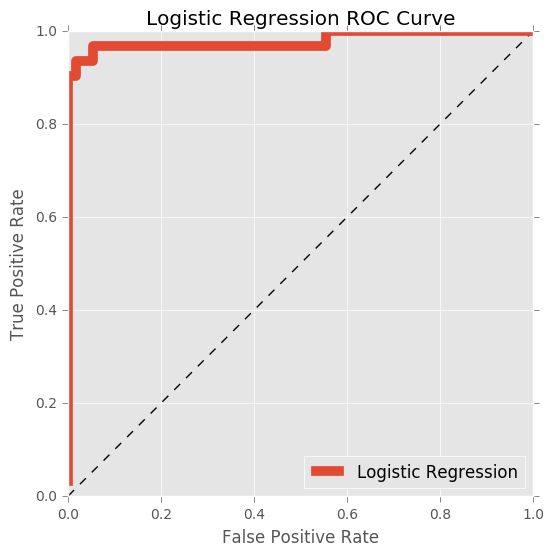

In [6]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', linewidth=7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='best')
plt.show()

# Lesson 3

In [7]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

print("Area under the Curve: " + str(roc_auc_score(y_test, y_pred_prob)))

Area under the Curve: 0.989388356669


In [8]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

cv_scores = cross_val_score(logreg, X, y, cv = 5, scoring='roc_auc')
print(cv_scores)

[ 0.99673203  0.99183007  0.99583796  1.          0.96140652]


In [9]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Instantiate a k-NN classifier
knn = KNeighborsClassifier()

# Tune the hyperparameter k-NN using GridSearchCV
knn_cv = GridSearchCV(knn, param_grid, cv = 5).fit(X, y)

# Print the tuned parameters and score
print("Tuned k-NN Number of Neighbors: " + str(knn_cv.best_params_))
print("Best score is " + str(knn_cv.best_score_))

Tuned k-NN Number of Neighbors: {'n_neighbors': 4}
Best score is 0.931034482759
